# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset

In [ ]:
df = keras.datasets.fashion_mnist

((X_train, y_train), (X_test, y_test)) = df.load_data()

# Explorar e exibir dados

## Vejo o shape dos dados de treino e teste

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

## Labels do que cada numero representa

In [ ]:
classification_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                        'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Plotando algumas das imagens
verificando as imagens e seus respectivos labels e variância de cores

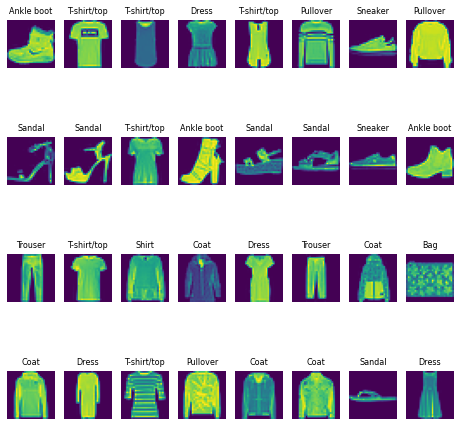

In [ ]:
fig, axes = plt.subplots(4, 8, figsize = (8, 8))
axes = axes.ravel()

for img in range(32):
  axes[img].imshow(X_train[img].reshape(28, 28))
  axes[img].set_title(classification_names[y_train[img]], fontsize = 8)
  axes[img].axis('off')
plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, '9')

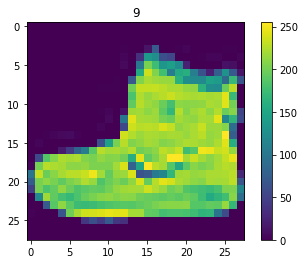

In [ ]:
plt.imshow(X_train[0])
plt.colorbar()
plt.title(y_train[0])

# Normalizando dados 
em vez de variar entre 0 e 255 deixaremos as cores variando entre 0 e 1

Text(0.5, 1.0, '9')

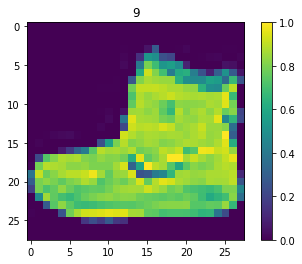

In [ ]:
X_train = X_train/255

plt.imshow(X_train[0])
plt.colorbar()
plt.title(y_train[0])

# Criando e treinando o modelo

  - camada 0 de entrada (flatten)
  -camada 1 de processamento (relu)
  -camada 2 de saída (softmax)

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(256, activation=tf.nn.relu),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(10, activation=tf.nn.softmax)  
                          ])

adam = keras.optimizers.Adam(learning_rate=0.001)

callbacks = [
            #  keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='best_model.hdf5', 
                                             monitor='val_loss', 
                                             save_best_only=True)
             ]

model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model_hist = model.fit(X_train, y_train, epochs=10, validation_split=0.2, 
                       batch_size=480, callbacks=callbacks)

Epoch 1/10
100/100 [==============================] - 2s 14ms/step - loss: 0.7375 - accuracy: 0.7470 - val_loss: 0.5043 - val_accuracy: 0.8261
Epoch 2/10
100/100 [==============================] - 1s 13ms/step - loss: 0.4759 - accuracy: 0.8370 - val_loss: 0.4392 - val_accuracy: 0.8462
Epoch 3/10
100/100 [==============================] - 2s 18ms/step - loss: 0.4243 - accuracy: 0.8527 - val_loss: 0.4007 - val_accuracy: 0.8560
Epoch 4/10
100/100 [==============================] - 1s 13ms/step - loss: 0.3923 - accuracy: 0.8619 - val_loss: 0.3805 - val_accuracy: 0.8631
Epoch 5/10
100/100 [==============================] - 1s 12ms/step - loss: 0.3735 - accuracy: 0.8673 - val_loss: 0.3628 - val_accuracy: 0.8725
Epoch 6/10
100/100 [==============================] - 1s 13ms/step - loss: 0.3540 - accuracy: 0.8747 - val_loss: 0.3543 - val_accuracy: 0.8742
Epoch 7/10
100/100 [==============================] - 1s 13ms/step - loss: 0.3374 - accuracy: 0.8798 - val_loss: 0.3502 - val_accuracy: 0.8752

# Sumario do modelo

In [ ]:
summary_model = model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Salvando o modelo

In [ ]:
model.save('model.h5')
saved_model = load_model('model.h5')

# Testando o modelo 

In [ ]:
tests = model.predict(X_test)

print('result: ', np.argmax(tests[1]))
print('actual label: ', y_test[1])

tests_saved_model = saved_model.predict(X_test) 

print('\nresult: ', np.argmax(tests_saved_model[1]))
print('actual label: ', y_test[1])

result:  2
actual label:  2

result:  2
actual label:  2


In [ ]:
loss_test, acc_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 72.0635 - accuracy: 0.8518


# Verificando os resultados

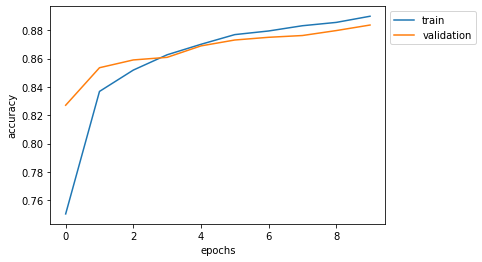

In [ ]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], bbox_to_anchor=(1.0, 1.0))

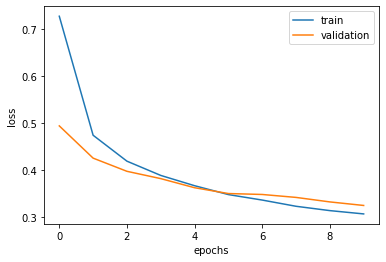

In [ ]:
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], bbox_to_anchor=(1.0, 1.0))

# Pesos e vieses da primeira camada dense

mexendo com os pesos e vieses para ver oque acontece com o modelo

In [ ]:
dense_weights = model.layers[1].get_weights()[0]
dense_bias = model.layers[1].get_weights()[1]



In [ ]:
dense_weights.shape
dense_weights_zeros = np.zeros((784, 256))
dense_weights_random = np.random.rand(784, 256)

model.layers[1].set_weights(
    [dense_weights_random, dense_bias]
    )
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model_hist = model.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=480)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 110.9644 - accuracy: 0.4218 - val_loss: 15.9416 - val_accuracy: 0.7463
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 32.1086 - accuracy: 0.6371 - val_loss: 11.2195 - val_accuracy: 0.7606
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 14.5267 - accuracy: 0.7038 - val_loss: 6.4548 - val_accuracy: 0.7890
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 7.1475 - accuracy: 0.7387 - val_loss: 3.8617 - val_accuracy: 0.7982
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 3.7505 - accuracy: 0.7636 - val_loss: 2.4339 - val_accuracy: 0.8043


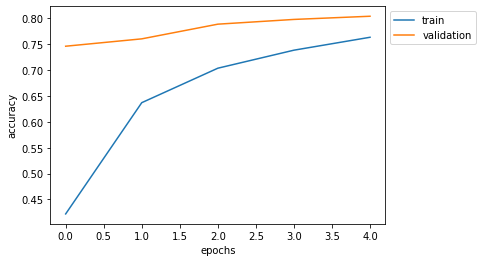

In [ ]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], bbox_to_anchor=(1.0, 1.0))

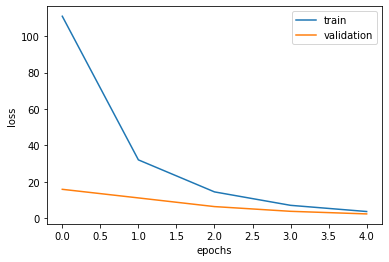

In [ ]:
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], bbox_to_anchor=(1.0, 1.0))

In [ ]:
dense_bias.shape
dense_bias_zeros = np.zeros((256))

model.layers[1].set_weights(
    [dense_weights_zeros, dense_bias_zeros]
    )
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model_hist = model.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=480)

Epoch 1/5
100/100 [==============================] - 2s 14ms/step - loss: 2.3054 - accuracy: 0.0993 - val_loss: 2.3042 - val_accuracy: 0.1003
Epoch 2/5
100/100 [==============================] - 1s 14ms/step - loss: 2.3034 - accuracy: 0.0999 - val_loss: 2.3032 - val_accuracy: 0.1003
Epoch 3/5
100/100 [==============================] - 1s 14ms/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3029 - val_accuracy: 0.1003
Epoch 4/5
100/100 [==============================] - 1s 12ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 5/5
100/100 [==============================] - 1s 15ms/step - loss: 2.3026 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.0957


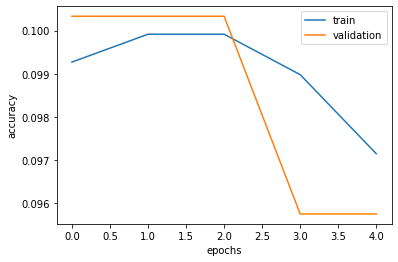

In [ ]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], bbox_to_anchor=(1.0, 1.0))

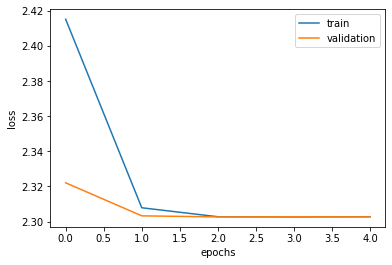

In [ ]:
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], bbox_to_anchor=(1.0, 1.0))